# Classification - Random Forest

Accuracy : 0.3617

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(50000, -1)
X_test = X_test.reshape(10000, -1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)


## Build and Train Model

In [26]:
clf = RandomForestClassifier(max_depth=None, random_state=0)

In [27]:
clf.fit(X_train, y_train)

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Evaluate

In [28]:
clf.predict(X_test[0].reshape(1,-1))

array([1], dtype=uint8)

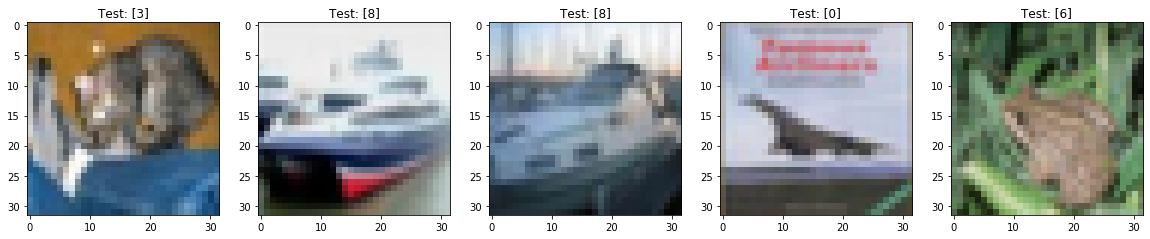

In [29]:
plt.figure(figsize=(20, 4))
for idx, (img, label) in enumerate(zip(X_test[:5], y_test[:5])):
    plt.subplot(1, 5, idx+1)
    plt.imshow(np.reshape(img, (32,32,3)), cmap=plt.cm.gray)
    plt.title(f'Test: {label}')

In [30]:
y_pred = clf.predict(X_test)

In [31]:
score = accuracy_score(y_test, y_pred)
print(score)

0.3617


## Confusion Matrix

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]

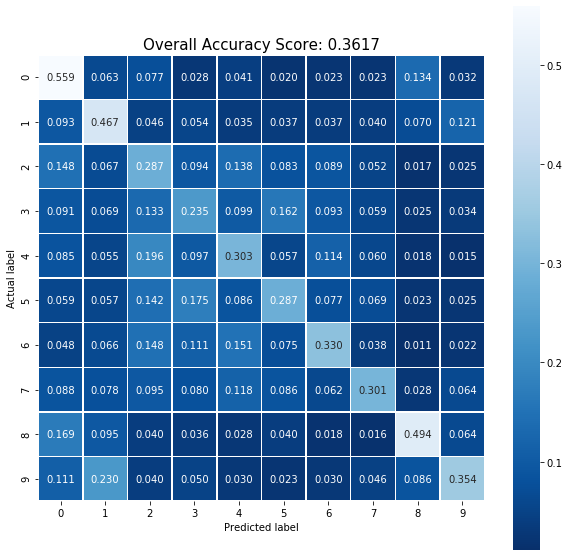

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_RandomForest.png')
plt.show();